In [1]:
%pip install -U pip setuptools wheel
%pip install -U 'spacy[cuda-autodetect]'
!python3 -m spacy download en_core_web_lg -qq
%pip install pyLDAvis -qq
%pip install -qq -U gensim
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python3` not found (But cell magic `%%python3` exists, did you mean that instead?).


In [2]:
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim_models
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nlp =spacy.load('en_core_web_lg')
sns.set()
pyLDAvis.enable_notebook()  # Visualise inside a notebook


2023-03-07 15:58:03.014050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 15:58:04.535939: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-07 15:58:04.536185: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-07 15:58:04.536194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
import pandas as pd

df  = pd.read_csv("./questions_with_tags_texts_codes.csv", converters={'tag_set': eval, 'tag_list': eval})
df

Id                                              Title  \
0       56876342         Chrome Save as PDF changing CJK characters   
1       56876620  Unsure how to use colormap with Folium marker ...   
2       56876783  How to correctly import BillingResponse with n...   
3       56876817  PytestDeprecationWarning at test setup: the fu...   
4       56876823  Put the legend of pandas bar plot with seconda...   
...          ...                                                ...   
536174  38926965           Invalid VirtualBox parameter "–cpuidset"   
536175  38927124  Computing Signature/Hash in Javascript and hav...   
536176  38927230  Panda AssertionError columns passed, passed da...   
536177  38927267  Spring MVC accessing Spring Security ConfigAtt...   
536178  38927302  Cannot resolve symbol abc_ic_search_api_mtrl_a...   

                                                     Body  \
0       <p>We are seeing an issue when we try to save ...   
1       <p>I have a dataframe with latitude, longitude...   
2       <p>I'm upgrading my version of android billing...   
3       <p>Following tutorial on <a href="https://test...   
4       <p>I have a pandas DataFrame with a secondary ...   
...                                                   ...   
536174  <p>I want to add the OS X El Capitan to my Vir...   
536175  <p>I have the following code in C#</p>\n\n<pre...   
536176  <p>I am working on Azure ML implementation on ...   
536177  <p>I want to produce HTTP Response Body with a...   
536178  <p>So in my project I was using standard mater...   

                                                     Tags  Score  ViewCount  \
0                     <html><google-chrome><pdf><unicode>      9        862   
1                      <python><pandas><colormap><folium>     10      11855   
2                 <java><android><gradle><in-app-billing>      9       2630   
3               <python><django><pytest><django-channels>      7       1340   
4       <python><pandas><matplotlib><plot><jupyter-not...      6       1474   
...                                                   ...    ...        ...   
536174          <macos><cmd><virtual-machine><virtualbox>      7      14522   
536175           <javascript><c#><hash><sha256><cryptojs>      7       4197   
536176  <python><pandas><dataframe><nltk><azure-machin...      7      53272   
536177  <spring><spring-mvc><spring-security><spring-b...      6        903   
536178  <android><android-layout><android-studio><mate...     10       4409   

        AnswerCount  nbtags  \
0                 1       4   
1                 1       4   
2                 2       4   
3                 1       4   
4                 1       5   
...             ...     ...   
536174            3       4   
536175            1       5   
536176            1       5   
536177            1       4   
536178            2       5   

                                                  tag_set  \
0                     {unicode, google-chrome, pdf, html}   
1                      {colormap, pandas, folium, python}   
2                 {in-app-billing, android, gradle, java}   
3               {django-channels, python, django, pytest}   
4       {matplotlib, pandas, jupyter-notebook, python,...   
...                                                   ...   
536174          {virtualbox, macos, virtual-machine, cmd}   
536175           {javascript, hash, c#, cryptojs, sha256}   
536176  {pandas, nltk, azure-machine-learning-studio, ...   
536177  {spring, spring-mvc, spring-boot, spring-secur...   
536178  {material-design, android, android-layout, and...   

                                                 tag_list  \
0                     [html, google-chrome, pdf, unicode]   
1                      [python, pandas, colormap, folium]   
2                 [java, android, gradle, in-app-billing]   
3               [python, django, pytest, django-channels]   
4       [python, pandas, matplotlib, plot, jupyter-not...   
...    

<AxesSubplot:>

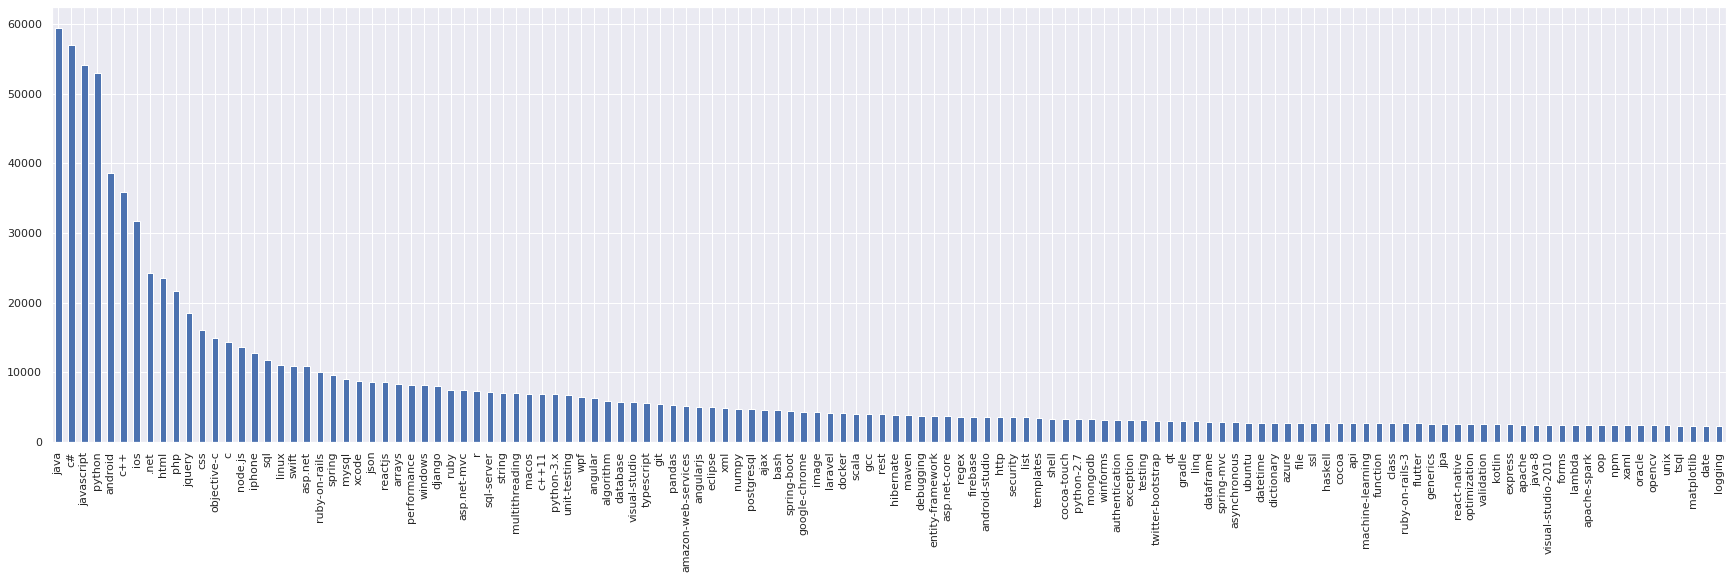

In [4]:
stack = df.tag_list.apply(pd.Series).stack()
stack.value_counts().iloc[0:128].plot.bar(figsize=(30,8))

In [5]:
selected_tags = set(stack.value_counts().iloc[0:16].index)

In [6]:
sample_df = df[df.tag_set.apply(lambda x: len(x & selected_tags))!=0].sample(50000)
sample_df


Id                                              Title  \
294083  26174692    How to get data from blocks using NSURLSession?   
81045   55558759  Change default timezone in ASP.NET Core 2.2 on...   
276091   8560810  Aligning JMenu on the right corner of JMenuBar...   
228581  17880476                                Joins in Javascript   
249371   6634582    How to resize iframe when parent window resizes   
...          ...                                                ...   
34135   71397495  Why does = default member initializer request ...   
413347  43049060           Laravel dusk not working .env.dusk.local   
285696   9270214  html5 canvas - animating an object following a...   
63504   51803582      AWS S3 ListObjects in Node.js Lambda Function   
357671  21200428  Android Exception : java.io.IOException: open ...   

                                                     Body  \
294083  <p>I have problem with this block. I trying to...   
81045   <p>I want to use German date formatting as def...   
276091  <p>So if i have a <code>JMenu</code> &amp; <co...   
228581  <p>I have 2 lists of objects:</p>\n\n<pre><cod...   
249371  <p>I don't think this is not another "resize i...   
...                                                   ...   
34135   <p>This is a follow up of this question: <a hr...   
413347  <p>I have an application and I want to use Lar...   
285696  <p>I'm a bit new to canvas and such so forgive...   
63504   <p>I am attempting to list an S3 bucket from w...   
357671  <p>For some strange reason, am constantly faci...   

                                                     Tags  Score  ViewCount  \
294083  <ios><objective-c><objective-c-blocks><nsurlse...      8      13964   
81045   <c#><docker><asp.net-core><localization><timez...     10      10104   
276091                     <java><swing><jmenu><jmenubar>      7      21333   
228581          <javascript><join><underscore.js><lodash>     16      20517   
249371          <javascript><css><iframe><resize><window>     17      49649   
...                                                   ...    ...        ...   
34135   <c++><language-lawyer><unique-ptr><pimpl-idiom...     16        403   
413347            <php><laravel><laravel-5><laravel-dusk>     12       3448   
285696           <html><animation><html5-canvas><raphael>     18      19958   
63504   <node.js><amazon-web-services><amazon-s3><aws-...      6       6907   
357671        <android><permissions><camera><ioexception>     24      60509   

        AnswerCount  nbtags  \
294083            4       4   
81045             2       5   
276091            4       4   
228581            8       4   
249371            4       5   
...             ...     ...   
34135             1       5   
413347            1       4   
285696            3       4   
63504             2       4   
357671            2       4   

                                                  tag_set  \
294083  {nsurlsession, objective-c, ios, objective-c-b...   
81045   {c#, asp.net-core, localization, docker, timez...   
276091                     {jmenu, swing, jmenubar, java}   
228581          {javascript, join, lodash, underscore.js}   
249371          {javascript, iframe, css, resize, window}   
...                                                   ...   
34135   {unique-ptr, template-instantiation, c++, lang...   
413347            {php, laravel, laravel-dusk, laravel-5}   
285696           {html5-canvas, raphael, animation, html}   
63504   {amazon-s3, aws-lambda, node.js, amazon-web-se...   
357671        {ioexception, android, camera, permissions}   

                                                 tag_list  \
294083  [ios, objective-c, objective-c-blocks, nsurlse...   
81045   [c#, docker, asp.net-core, localization, timez...   
276091                     [java, swing, jmenu, jmenubar]   
228581          [javascript, join, underscore.js, lodash]   
249371          [javascript, css, iframe, resize, window]   
...    

<AxesSubplot:>

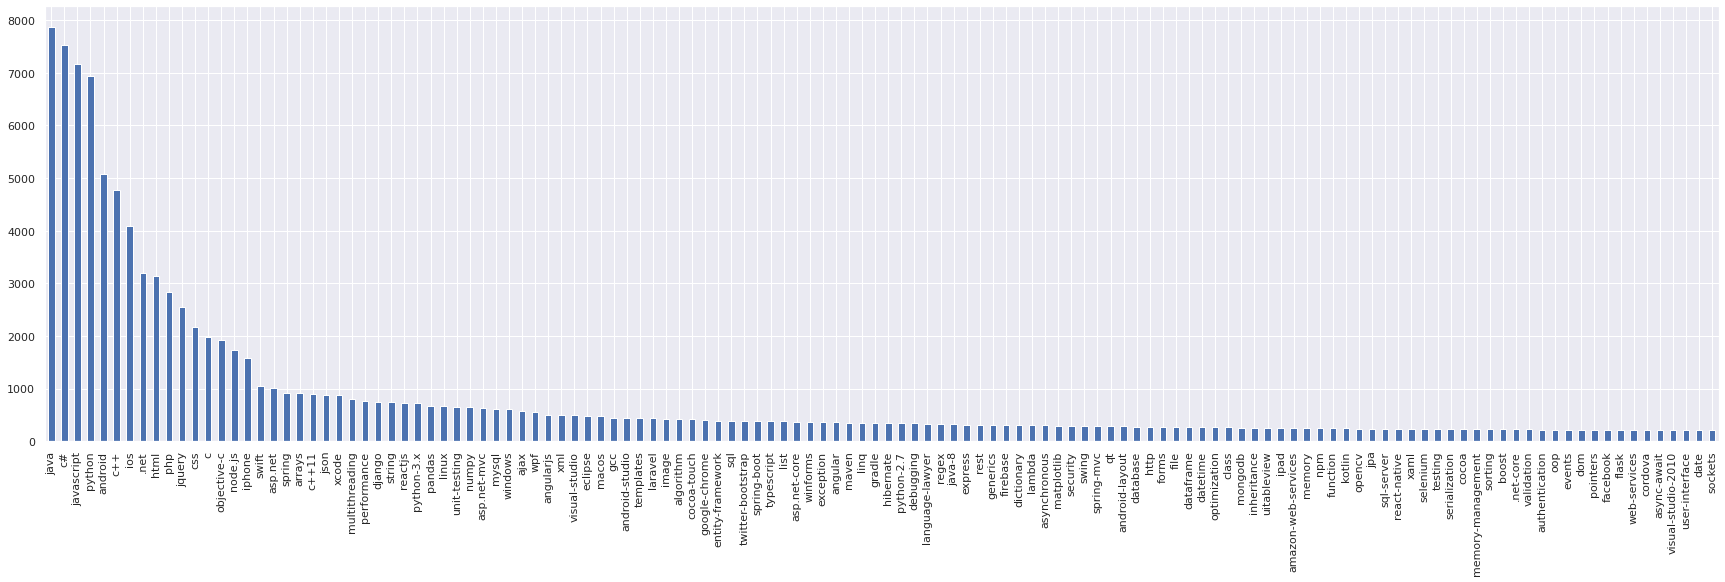

In [7]:
sample_stack = sample_df.tag_list.apply(pd.Series).stack()
sample_stack.value_counts().iloc[0:128].plot.bar(figsize=(30,8))

In [8]:
sample_df.fillna('', inplace=True)


In [9]:
for tag in selected_tags:
    sample_df[tag] = sample_df.tag_set.apply(lambda x: 1 if tag in x else 0)

sample_df

Id                                              Title  \
294083  26174692    How to get data from blocks using NSURLSession?   
81045   55558759  Change default timezone in ASP.NET Core 2.2 on...   
276091   8560810  Aligning JMenu on the right corner of JMenuBar...   
228581  17880476                                Joins in Javascript   
249371   6634582    How to resize iframe when parent window resizes   
...          ...                                                ...   
34135   71397495  Why does = default member initializer request ...   
413347  43049060           Laravel dusk not working .env.dusk.local   
285696   9270214  html5 canvas - animating an object following a...   
63504   51803582      AWS S3 ListObjects in Node.js Lambda Function   
357671  21200428  Android Exception : java.io.IOException: open ...   

                                                     Body  \
294083  <p>I have problem with this block. I trying to...   
81045   <p>I want to use German date formatting as def...   
276091  <p>So if i have a <code>JMenu</code> &amp; <co...   
228581  <p>I have 2 lists of objects:</p>\n\n<pre><cod...   
249371  <p>I don't think this is not another "resize i...   
...                                                   ...   
34135   <p>This is a follow up of this question: <a hr...   
413347  <p>I have an application and I want to use Lar...   
285696  <p>I'm a bit new to canvas and such so forgive...   
63504   <p>I am attempting to list an S3 bucket from w...   
357671  <p>For some strange reason, am constantly faci...   

                                                     Tags  Score  ViewCount  \
294083  <ios><objective-c><objective-c-blocks><nsurlse...      8      13964   
81045   <c#><docker><asp.net-core><localization><timez...     10      10104   
276091                     <java><swing><jmenu><jmenubar>      7      21333   
228581          <javascript><join><underscore.js><lodash>     16      20517   
249371          <javascript><css><iframe><resize><window>     17      49649   
...                                                   ...    ...        ...   
34135   <c++><language-lawyer><unique-ptr><pimpl-idiom...     16        403   
413347            <php><laravel><laravel-5><laravel-dusk>     12       3448   
285696           <html><animation><html5-canvas><raphael>     18      19958   
63504   <node.js><amazon-web-services><amazon-s3><aws-...      6       6907   
357671        <android><permissions><camera><ioexception>     24      60509   

        AnswerCount  nbtags  \
294083            4       4   
81045             2       5   
276091            4       4   
228581            8       4   
249371            4       5   
...             ...     ...   
34135             1       5   
413347            1       4   
285696            3       4   
63504             2       4   
357671            2       4   

                                                  tag_set  \
294083  {nsurlsession, objective-c, ios, objective-c-b...   
81045   {c#, asp.net-core, localization, docker, timez...   
276091                     {jmenu, swing, jmenubar, java}   
228581          {javascript, join, lodash, underscore.js}   
249371          {javascript, iframe, css, resize, window}   
...                                                   ...   
34135   {unique-ptr, template-instantiation, c++, lang...   
413347            {php, laravel, laravel-dusk, laravel-5}   
285696           {html5-canvas, raphael, animation, html}   
63504   {amazon-s3, aws-lambda, node.js, amazon-web-se...   
357671        {ioexception, android, camera, permissions}   

                                                 tag_list  ... php android  \
294083  [ios, objective-c, objective-c-blocks, nsurlse...  ...   0       0   
81045   [c#, docker, asp.net-core, localization, timez...  ...   0       0   
276091                     [java, swing, jmenu, jmenubar]  ...   0       0   
228581          [javascript, join, underscore.js, lodash]  ..

/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

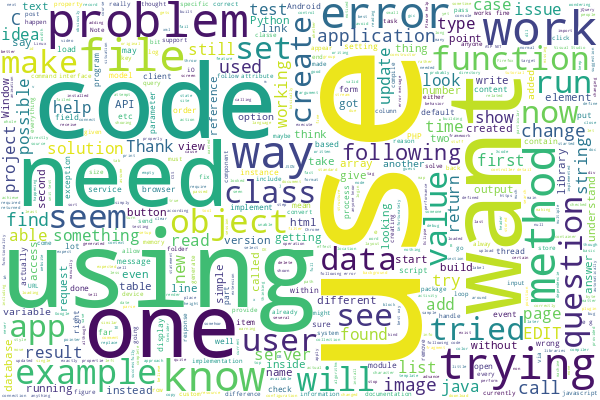

In [10]:
from wordcloud import WordCloud
long_string = ','.join(list(sample_df.text.values))
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue', width=600, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()


In [11]:
from sklearn.decomposition import PCA
from sklearn import preprocessing, cluster, decomposition, metrics, manifold
# Tags I want to remove from the text
removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT',
           'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM']
tokens = []
vectors = []
token_vectors = []
for summary in nlp.pipe(sample_df.text):
   question_tokens = []
   question_token_vectors = []
   for token in summary:
      if token.pos_ not in removal and not token.is_stop and token.is_alpha:
         question_tokens.append(token.lemma_)
         question_token_vectors.append(token.vector)
   # question_tokens = [token.lemma_ for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(question_tokens)
   vectors.append(summary.vector)
   token_vectors.append(question_token_vectors)
tokens
sample_df["tokens"] = tokens


In [12]:
from tqdm import tqdm

silhouettes = []
inertias = []
X_scaled = preprocessing.StandardScaler().fit_transform(vectors)
ks = range(2, 15)
for k in tqdm(ks):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    silhouettes.append(metrics.silhouette_score(X_scaled, kmeans.labels_))
    inertias.append(kmeans.inertia_)


100%|██████████| 13/13 [13:16<00:00, 61.29s/it]


(0.0, 13268997.104491664)

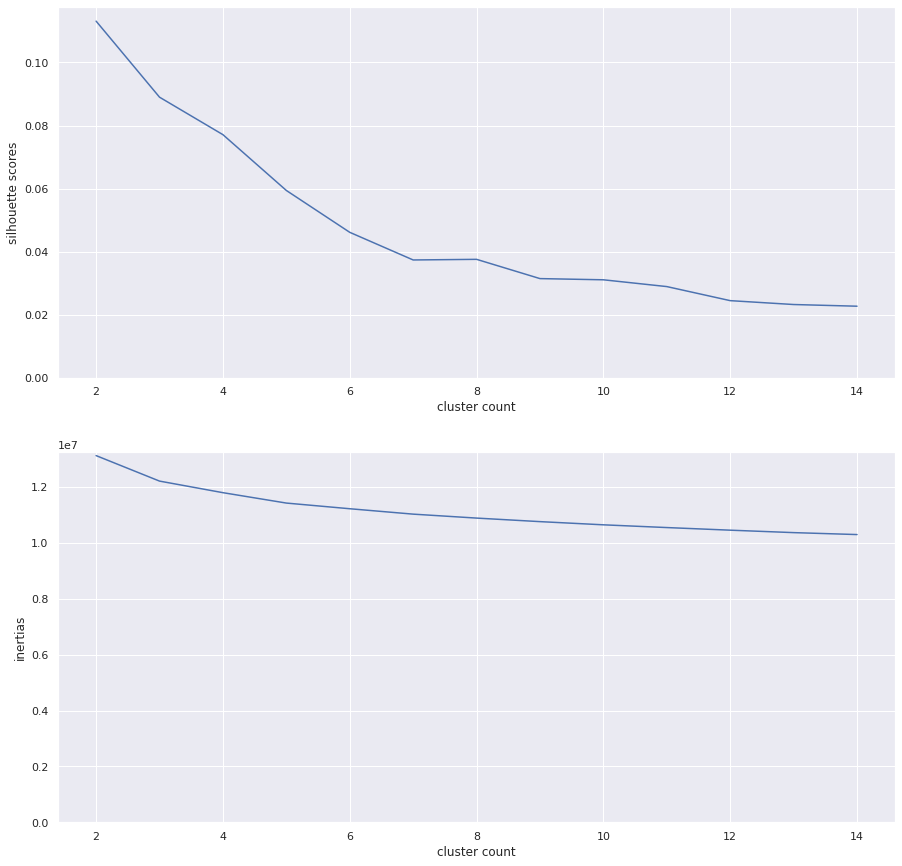

In [13]:
f, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].plot(ks, silhouettes)
axes[0].set_xlabel('cluster count')
axes[0].set_ylabel('silhouette scores')
axes[0].set_ylim(ymin=0)
axes[1].plot(ks, inertias)
axes[1].set_xlabel('cluster count')
axes[1].set_ylabel('inertias')
axes[1].set_ylim(ymin=0)


<AxesSubplot:>

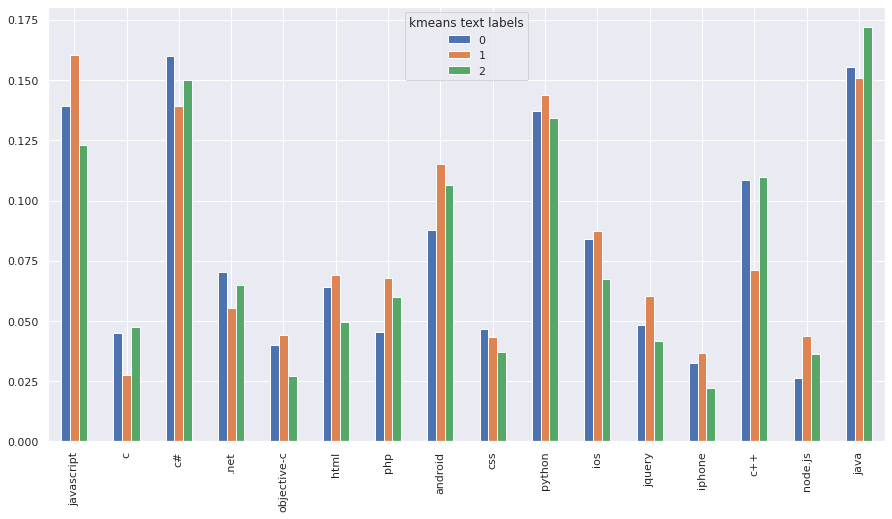

In [14]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_scaled)
sample_df["kmeans text labels"] = kmeans.labels_
sample_df.groupby(
    "kmeans text labels")[list(selected_tags)].mean().transpose().plot.bar(figsize=(15, 8))


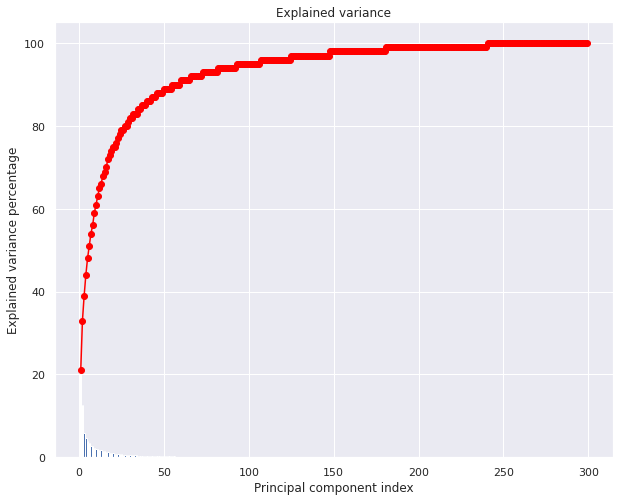

In [15]:

X_scaled = preprocessing.StandardScaler().fit_transform(vectors)
n_components = X_scaled.shape[1]-1
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
explained_variance_percentage = (pca.explained_variance_ratio_*100).round(2)
explained_variance_percentage_cum = explained_variance_percentage.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(x_list, explained_variance_percentage)
plt.plot(x_list, explained_variance_percentage_cum, c="red", marker='o')
plt.xlabel("Principal component index")
plt.ylabel("Explained variance percentage")
plt.title("Explained variance")
plt.show(block=False)


100%|██████████| 13/13 [10:48<00:00, 49.90s/it]


(0.0, 11553553.446360637)

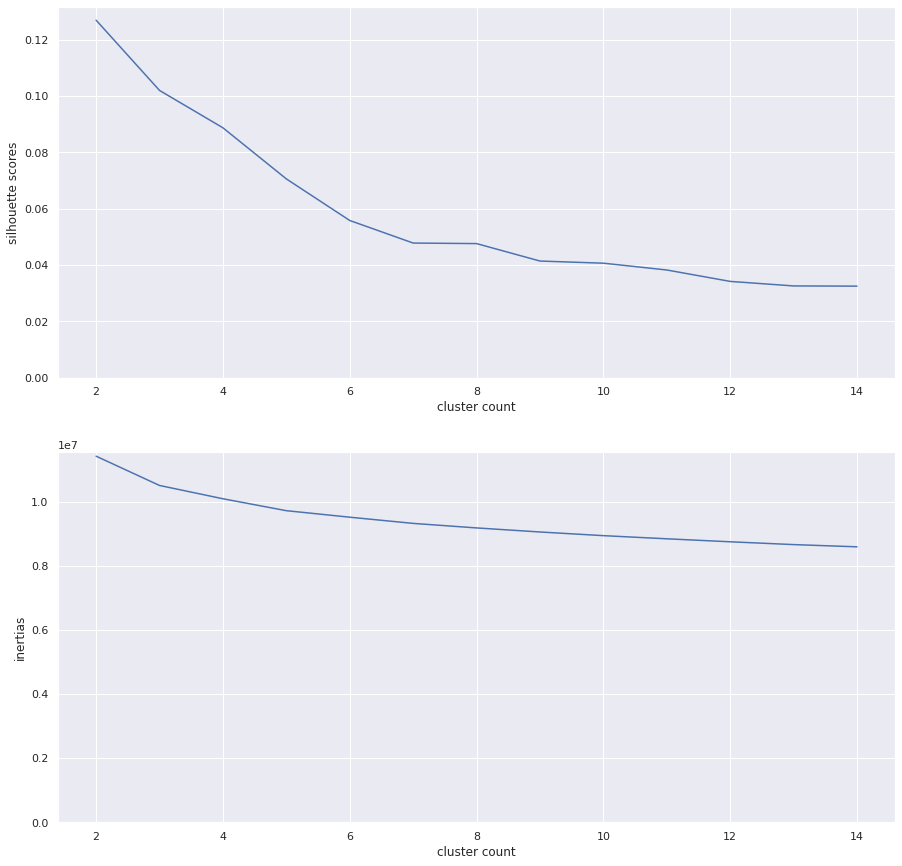

In [16]:
from tqdm import tqdm
pca = PCA(n_components=50)
X_transformed = pca.fit_transform(X_scaled)
# X_transformed = pca.transform(X_scaled)
# X_transformed = X_transformed[:,:50]
silhouettes = []
inertias = []
ks = range(2, 15)
for k in tqdm(ks):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_transformed)
    silhouettes.append(metrics.silhouette_score(X_transformed, kmeans.labels_))
    inertias.append(kmeans.inertia_)

f, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].plot(ks, silhouettes)
axes[0].set_xlabel('cluster count')
axes[0].set_ylabel('silhouette scores')
axes[0].set_ylim(ymin=0)
axes[1].plot(ks, inertias)
axes[1].set_xlabel('cluster count')
axes[1].set_ylabel('inertias')
axes[1].set_ylim(ymin=0)


<AxesSubplot:>

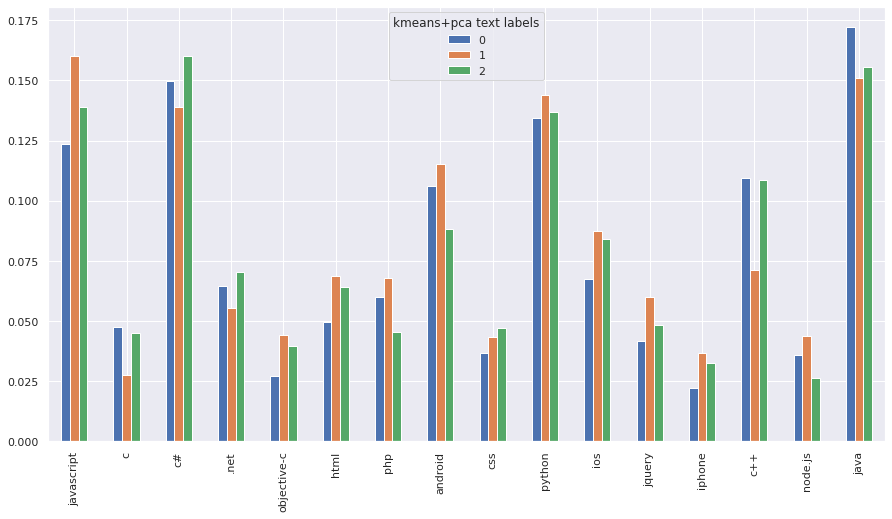

In [17]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_transformed)
sample_df["kmeans+pca text labels"] = kmeans.labels_
sample_df.groupby(
    "kmeans+pca text labels")[list(selected_tags)].mean().transpose().plot.bar(figsize=(15, 8))


/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

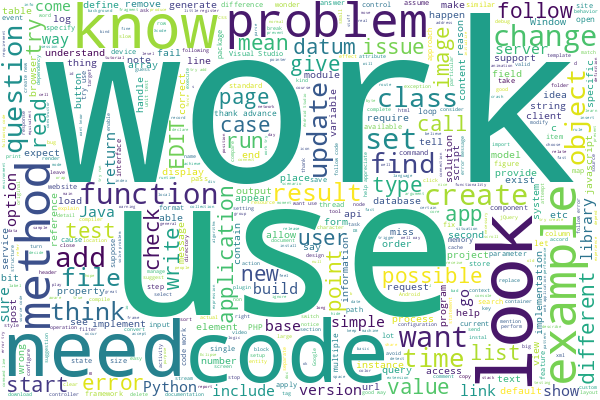

In [18]:
long_string = ','.join([','.join(x) for x in tokens])
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue', width=600, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()


In [19]:
dictionary = Dictionary(sample_df['tokens'])
len(dictionary.token2id)


58252

In [20]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
len(dictionary.token2id)


1000

/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

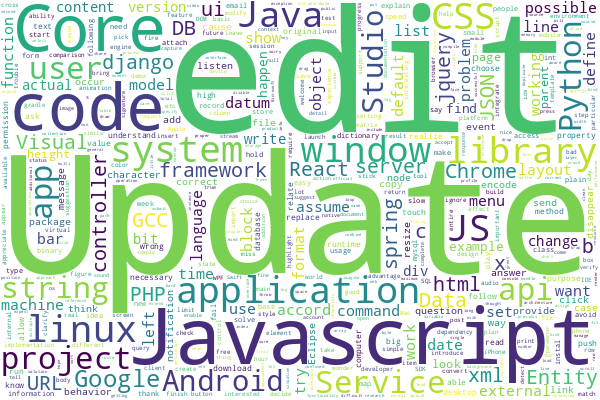

In [21]:
long_string = ','.join(dictionary.token2id.keys())
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue', width=600, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()


In [22]:
corpus = [dictionary.doc2bow(doc) for doc in sample_df['tokens']]


In [23]:
from tqdm import tqdm
topics = range(1, 21)
c_umass_score = []
c_v_score = []
for i in tqdm(topics):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10,
                            num_topics=i, workers=4, passes=10, random_state=100)
   c_umass = CoherenceModel(model=lda_model, corpus=corpus,
                       dictionary=dictionary, coherence='u_mass')
   c_v = CoherenceModel(model=lda_model, corpus=corpus, texts=sample_df['tokens'],
                            dictionary=dictionary, coherence='c_v')
   c_umass_score.append(c_umass.get_coherence())
   c_v_score.append(c_v.get_coherence())



100%|██████████| 20/20 [13:01<00:00, 39.07s/it]


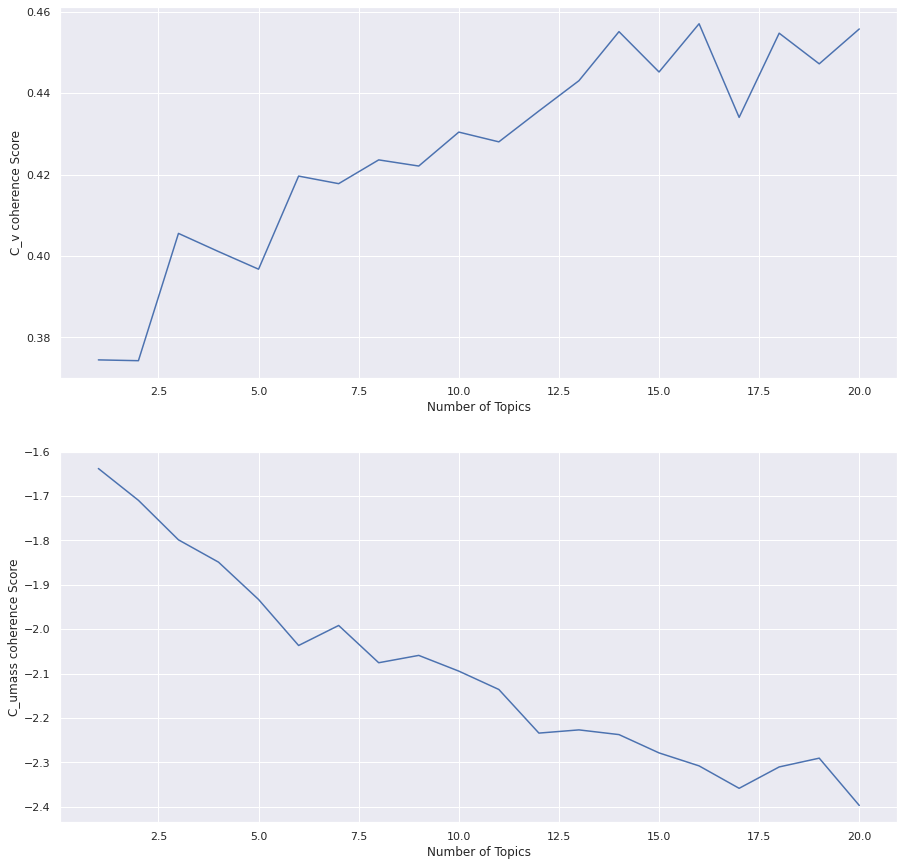

In [24]:
f, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].plot(topics, c_v_score)
axes[0].set_xlabel('Number of Topics')
axes[0].set_ylabel('C_v coherence Score')
axes[1].plot(topics, c_umass_score)
axes[1].set_xlabel('Number of Topics')
axes[1].set_ylabel('C_umass coherence Score')
plt.show()


In [35]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary,
                         iterations=100, num_topics=7, workers=4, passes=100)


In [36]:
lda_model.print_topics(-1)

[(0,
  '0.040*"page" + 0.028*"work" + 0.021*"event" + 0.017*"form" + 0.016*"browser" + 0.016*"click" + 0.016*"code" + 0.014*"try" + 0.014*"want" + 0.014*"element"'),
 (1,
  '0.024*"code" + 0.017*"use" + 0.016*"function" + 0.016*"time" + 0.015*"question" + 0.013*"thread" + 0.011*"memory" + 0.010*"way" + 0.010*"write" + 0.010*"know"'),
 (2,
  '0.061*"file" + 0.034*"error" + 0.030*"try" + 0.026*"run" + 0.022*"project" + 0.022*"work" + 0.016*"code" + 0.013*"build" + 0.012*"version" + 0.012*"use"'),
 (3,
  '0.028*"value" + 0.024*"datum" + 0.022*"string" + 0.020*"array" + 0.019*"want" + 0.017*"try" + 0.016*"list" + 0.016*"way" + 0.014*"table" + 0.013*"code"'),
 (4,
  '0.025*"app" + 0.024*"server" + 0.024*"user" + 0.021*"application" + 0.020*"request" + 0.015*"send" + 0.015*"api" + 0.014*"use" + 0.014*"service" + 0.014*"client"'),
 (5,
  '0.050*"class" + 0.038*"method" + 0.038*"object" + 0.028*"type" + 0.017*"use" + 0.014*"error" + 0.014*"function" + 0.014*"code" + 0.013*"create" + 0.013*"ret

In [37]:
sample_df.iloc[0].text


"I have problem with this block. I trying to get the data inside the block of \n.\n\n\nhere's my code\n\n\n\n\nIs it possible to get the data inside the blocks of \n? "

In [38]:
lda_model[corpus][0]

[(0, 0.014338842),
 (1, 0.48454913),
 (2, 0.014338849),
 (3, 0.4437732),
 (4, 0.014339193),
 (5, 0.014331739),
 (6, 0.01432902)]

In [39]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


/home/aurelien/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [40]:
sample_df['text_topic'] = [sorted(lda_model[corpus][text])[0][0]
                      for text in range(len(sample_df.text))]


<AxesSubplot:>

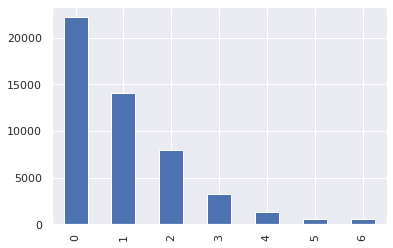

In [41]:
sample_df.text_topic.value_counts().plot.bar()


<AxesSubplot:>

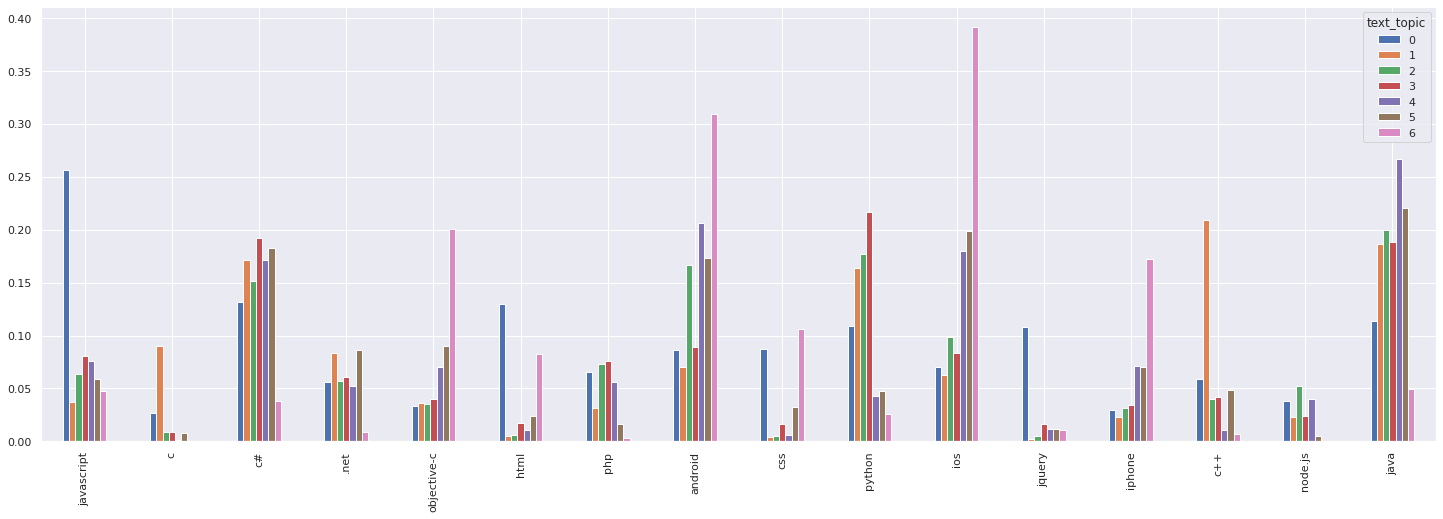

In [42]:
sample_df.groupby(
    "text_topic")[list(selected_tags)].mean().transpose().plot.bar(figsize=(25, 8))


/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

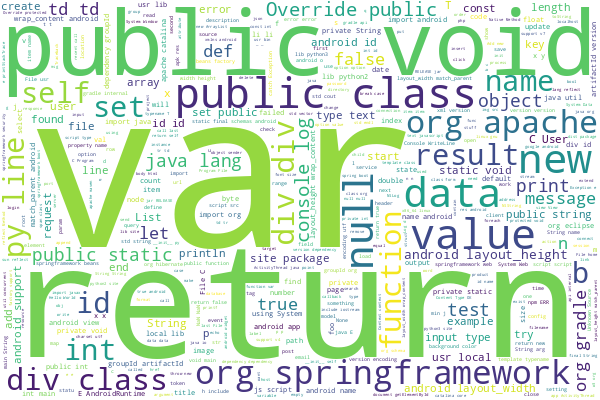

In [43]:
long_string = ','.join(list(sample_df.code.values))
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue', width=600, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()


In [44]:
# Tags I want to remove from the text
removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT',
           'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM']
tokens = []
vectors = []
token_vectors = []
for summary in nlp.pipe(sample_df.code):
   question_tokens = []
   question_token_vectors = []
   for token in summary:
      if token.pos_ not in removal and not token.is_stop and token.is_alpha:
         question_tokens.append(token.lemma_)
         question_token_vectors.append(token.vector)
   # question_tokens = [token.lemma_ for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(question_tokens)
   vectors.append(summary.vector)
   token_vectors.append(question_token_vectors)
sample_df["code_tokens"] = tokens


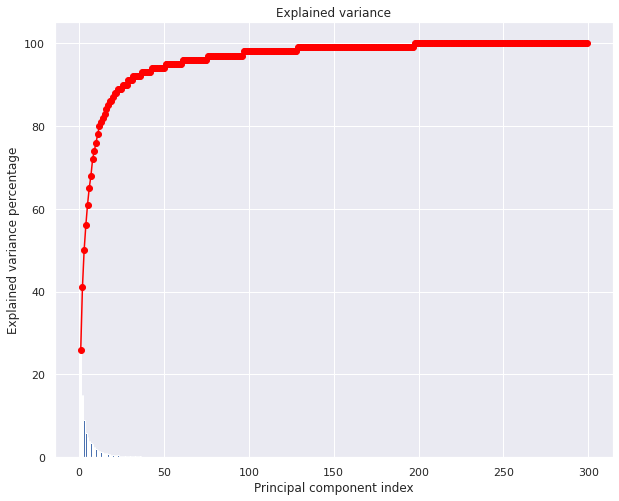

In [45]:

X_scaled = preprocessing.StandardScaler().fit_transform(vectors)
n_components = X_scaled.shape[1]-1
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
explained_variance_percentage = (pca.explained_variance_ratio_*100).round(2)
explained_variance_percentage_cum = explained_variance_percentage.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(x_list, explained_variance_percentage)
plt.plot(x_list, explained_variance_percentage_cum, c="red", marker='o')
plt.xlabel("Principal component index")
plt.ylabel("Explained variance percentage")
plt.title("Explained variance")
plt.show(block=False)


100%|██████████| 13/13 [10:44<00:00, 49.55s/it]


(0.0, 10801240.341899496)

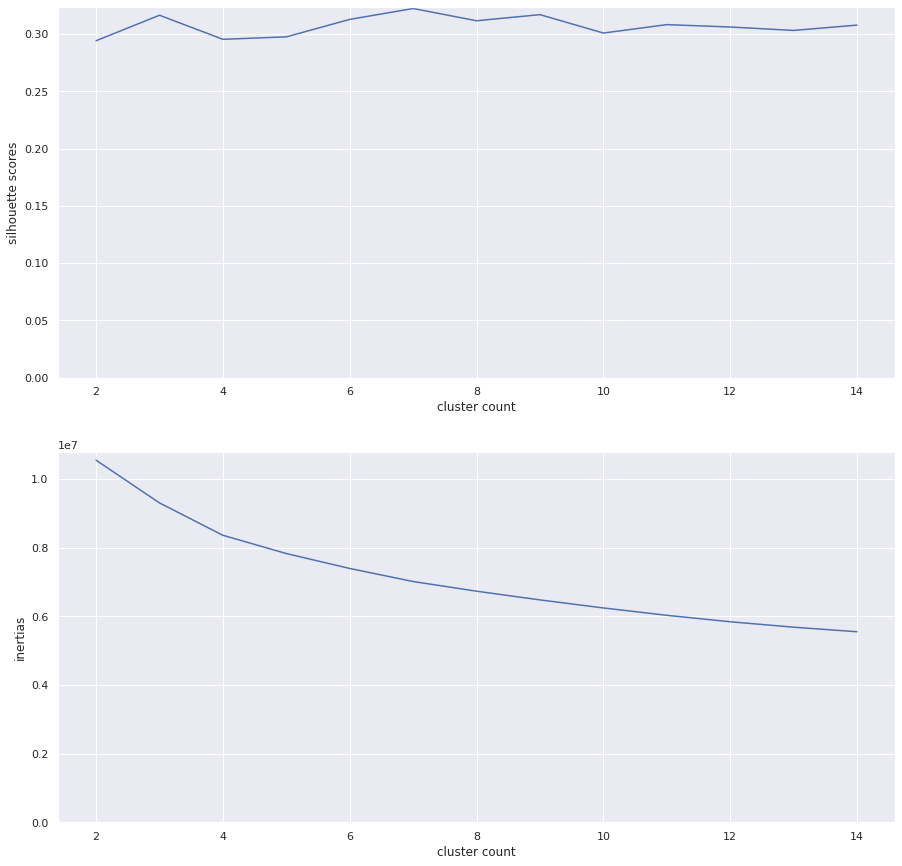

In [46]:
from tqdm import tqdm
pca = PCA(n_components=30)
X_transformed = pca.fit_transform(X_scaled)
# X_transformed = pca.transform(X_scaled)
# X_transformed = X_transformed[:,:50]
silhouettes = []
inertias = []
ks = range(2, 15)
for k in tqdm(ks):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_transformed)
    silhouettes.append(metrics.silhouette_score(X_transformed, kmeans.labels_))
    inertias.append(kmeans.inertia_)

f, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].plot(ks, silhouettes)
axes[0].set_xlabel('cluster count')
axes[0].set_ylabel('silhouette scores')
axes[0].set_ylim(ymin=0)
axes[1].plot(ks, inertias)
axes[1].set_xlabel('cluster count')
axes[1].set_ylabel('inertias')
axes[1].set_ylim(ymin=0)


<AxesSubplot:>

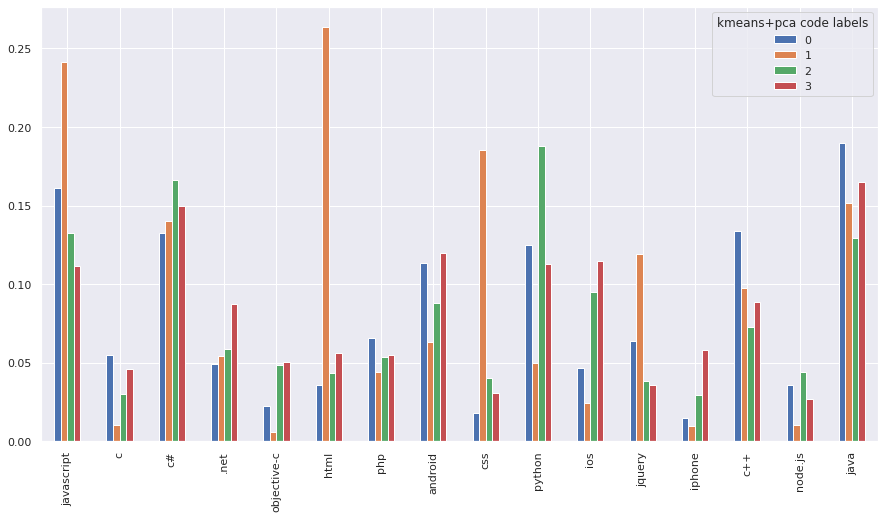

In [47]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X_transformed)
sample_df["kmeans+pca code labels"] = kmeans.labels_
sample_df.groupby(
    "kmeans+pca code labels")[list(selected_tags)].mean().transpose().plot.bar(figsize=(15, 8))


/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

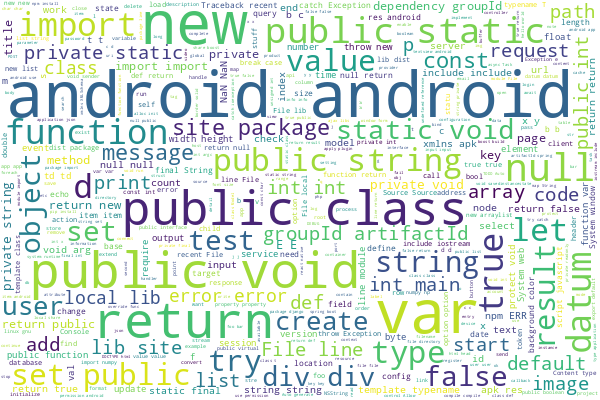

In [48]:
long_string = ','.join([','.join(x) for x in tokens])
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue', width=600, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()


In [49]:
code_dictionary = Dictionary(sample_df['code_tokens'])
len(code_dictionary.token2id)


116677

In [50]:
code_dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
len(code_dictionary.token2id)


1000

/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/aurelien/.local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

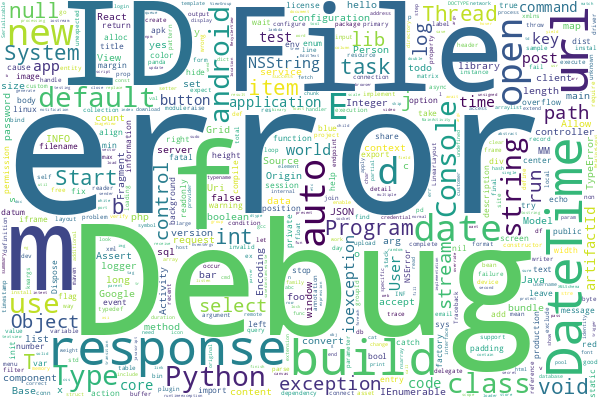

In [51]:
long_string = ','.join(code_dictionary.token2id.keys())
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue', width=600, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()


In [52]:
code_corpus = [code_dictionary.doc2bow(doc) for doc in sample_df['code_tokens']]


In [53]:
from tqdm import tqdm
topics = range(1, 21)
c_umass_score = []
c_v_score = []
for i in tqdm(topics):
   lda_model = LdaMulticore(corpus=code_corpus, id2word=code_dictionary, iterations=10,
                            num_topics=i, workers=4, passes=10, random_state=100)
   c_umass = CoherenceModel(model=lda_model, corpus=code_corpus,
                            dictionary=code_dictionary, coherence='u_mass')
   c_v = CoherenceModel(model=lda_model, corpus=code_corpus, texts=sample_df['code_tokens'],
                        dictionary=code_dictionary, coherence='c_v')
   c_umass_score.append(c_umass.get_coherence())
   c_v_score.append(c_v.get_coherence())



100%|██████████| 20/20 [09:12<00:00, 27.64s/it]


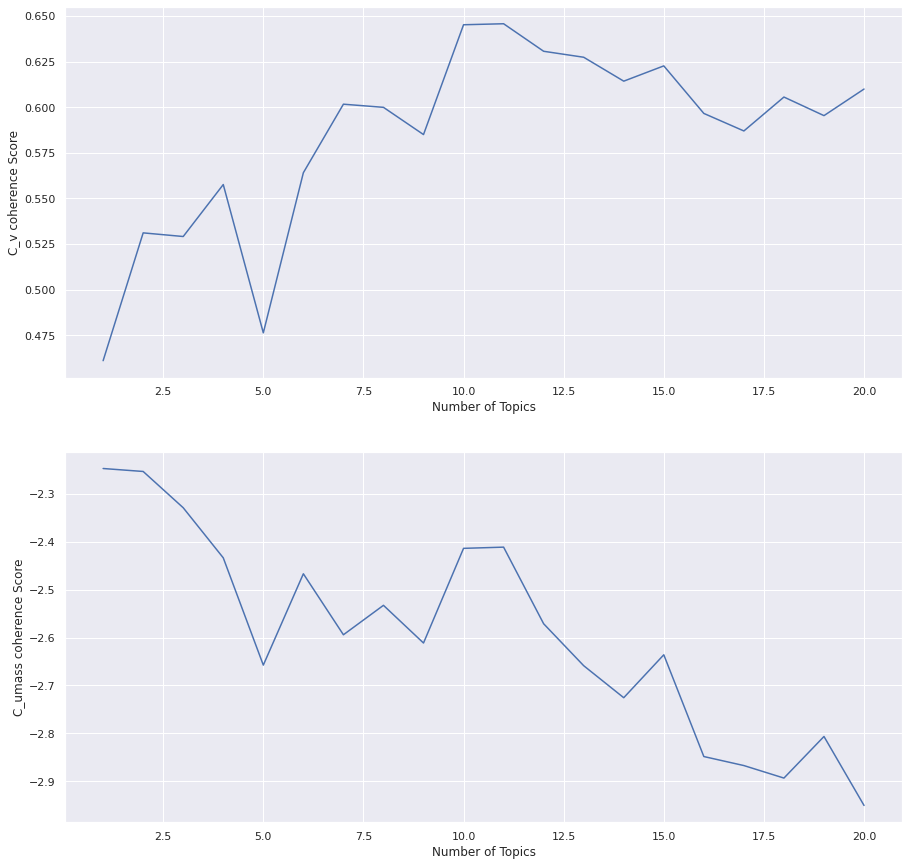

In [54]:
f, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].plot(topics, c_v_score)
axes[0].set_xlabel('Number of Topics')
axes[0].set_ylabel('C_v coherence Score')
axes[1].plot(topics, c_umass_score)
axes[1].set_xlabel('Number of Topics')
axes[1].set_ylabel('C_umass coherence Score')
plt.show()


In [56]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary,
                         iterations=100, num_topics=10, workers=4, passes=100)


In [57]:
lda_model.print_topics(-1)

[(0,
  '0.061*"test" + 0.044*"run" + 0.030*"thread" + 0.030*"time" + 0.022*"code" + 0.019*"call" + 0.016*"method" + 0.016*"process" + 0.015*"exception" + 0.013*"second"'),
 (1,
  '0.044*"page" + 0.026*"work" + 0.019*"event" + 0.019*"element" + 0.017*"browser" + 0.017*"click" + 0.015*"want" + 0.013*"component" + 0.013*"tag" + 0.013*"text"'),
 (2,
  '0.046*"server" + 0.037*"request" + 0.029*"send" + 0.026*"service" + 0.026*"client" + 0.025*"application" + 0.025*"api" + 0.023*"web" + 0.017*"app" + 0.016*"use"'),
 (3,
  '0.056*"class" + 0.035*"method" + 0.033*"object" + 0.033*"type" + 0.028*"function" + 0.017*"use" + 0.016*"code" + 0.011*"property" + 0.011*"way" + 0.011*"example"'),
 (4,
  '0.045*"user" + 0.034*"database" + 0.029*"table" + 0.028*"datum" + 0.022*"model" + 0.022*"query" + 0.021*"field" + 0.020*"create" + 0.017*"want" + 0.015*"store"'),
 (5,
  '0.042*"image" + 0.032*"app" + 0.028*"view" + 0.017*"device" + 0.017*"try" + 0.017*"work" + 0.016*"want" + 0.014*"set" + 0.014*"change

In [58]:
sample_df.iloc[0].code


'NSURLSession\n-(NSDictionary *) RetrieveData{\n\n    NSURLSession * session = [NSURLSession sharedSession];\n    NSURL * url = [NSURL URLWithString: self.getURL];\n    dataList =[[NSDictionary alloc] init];\n\n    NSURLSessionDataTask * dataTask = [session dataTaskWithURL:url completionHandler:^(NSData *data, NSURLResponse *response, NSError *error) {\n\n        self.json = [NSJSONSerialization JSONObjectWithData:data options:0 error:nil];\n\n    }];\n    return self.dataList;\n    [dataTask resume];\n\n}\n\nNSURLSession'

In [59]:
lda_model[code_corpus][0]

[(0, 0.46494907), (4, 0.4816965)]

In [60]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, code_corpus, code_dictionary)
pyLDAvis.display(lda_display)


/home/aurelien/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [61]:
sample_df['code_topic'] = [sorted(lda_model[code_corpus][code])[0][0]
                      for code in range(len(sample_df.code))]


<AxesSubplot:>

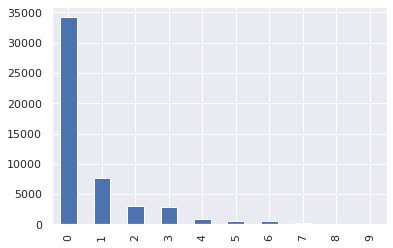

In [62]:
sample_df.code_topic.value_counts().plot.bar()


<AxesSubplot:>

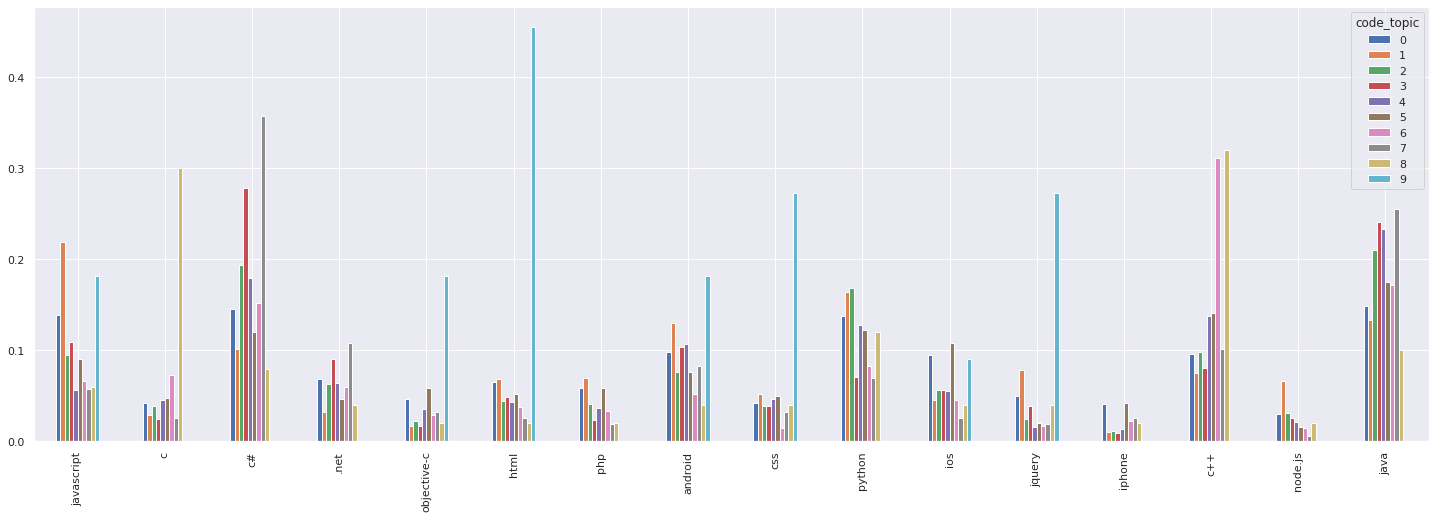

In [63]:
sample_df.groupby(
    "code_topic")[list(selected_tags)].mean().transpose().plot.bar(figsize=(25, 8))
